Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,DBSCAN,KMeans
from sklearn.preprocessing import normalize, MinMaxScaler,StandardScaler

In [3]:
air = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\assignment\7\EastWestAirlines.csv")

In [4]:
air.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
air.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace= True)
air

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
air.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
print('unique_cc1',air.cc1_miles.unique())
print('unique_cc2',air.cc2_miles.unique())
print('unique_cc3',air.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [10]:
# Missing value
air_null=air.isnull().sum().value_counts(ascending=False)
air_perc= (air.isnull().sum()*100/len(air)).value_counts(ascending=False)
print('Null count for columns:\n\n', air_null,'\n')
print('Null Percentage for columns:\n\n', air_perc,'\n')

Null count for columns:

 0    12
dtype: int64 

Null Percentage for columns:

 0.0    12
dtype: int64 



In [11]:
# Duplicate Values
air.duplicated().sum()

0

In [12]:
air[air.duplicated()]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award


In [13]:
# null count foe rows
air_row_null = air.isnull().sum(axis=1).value_counts(ascending = False)
air_perc_row = (air.isnull().sum(axis=1)*100/len(air)).value_counts(ascending = False)
print("Null Count for Rows:\n\n", air_row_null, "\n")
print("Null Percentage for Rows:\n\n", air_perc_row)

Null Count for Rows:

 0    3999
dtype: int64 

Null Percentage for Rows:

 0.0    3999
dtype: int64


In [14]:
# Standardizing the data 
standard_scaler = StandardScaler()
air_std = standard_scaler.fit_transform(air)
air_std.shape

(3999, 12)

In [15]:
# Normalizing the data
minmax=MinMaxScaler()
air_mm = minmax.fit_transform(air)
air_mm.shape

(3999, 12)

In [16]:
cluster_r= range(1,15)
clust_error= []
for num_clusters in cluster_r:
    clust =KMeans(num_clusters,n_init=10)
    clust.fit(air_std)
    labels = clust.labels_
    centro =clust.cluster_centers_
    clust_error.append(clust.inertia_)
air_clust = pd.DataFrame({'num_clusters':cluster_r,'clust_error':clust_error})
air_clust
        

,num_clusters,clust_error
0,1,47988.000000
1,2,39018.903270
2,3,34529.245009
3,4,30616.585414
4,5,26894.799956
5,6,23490.739979
6,7,20923.301702
7,8,19330.155332
8,9,17986.213614
9,10,16768.275117


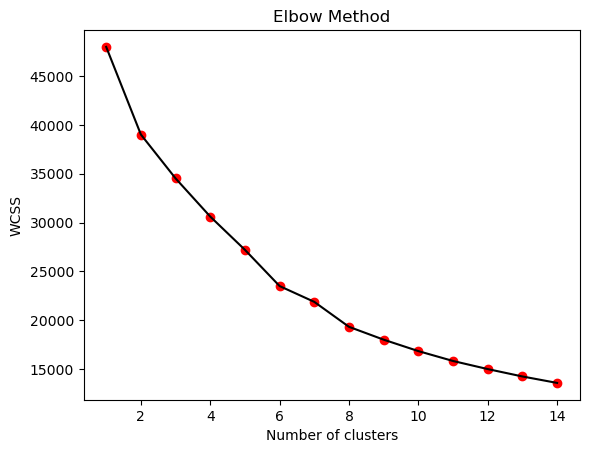

In [26]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(air_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 15), wcss, color = 'black')
plt.scatter(range(1,15),wcss,color = 'red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

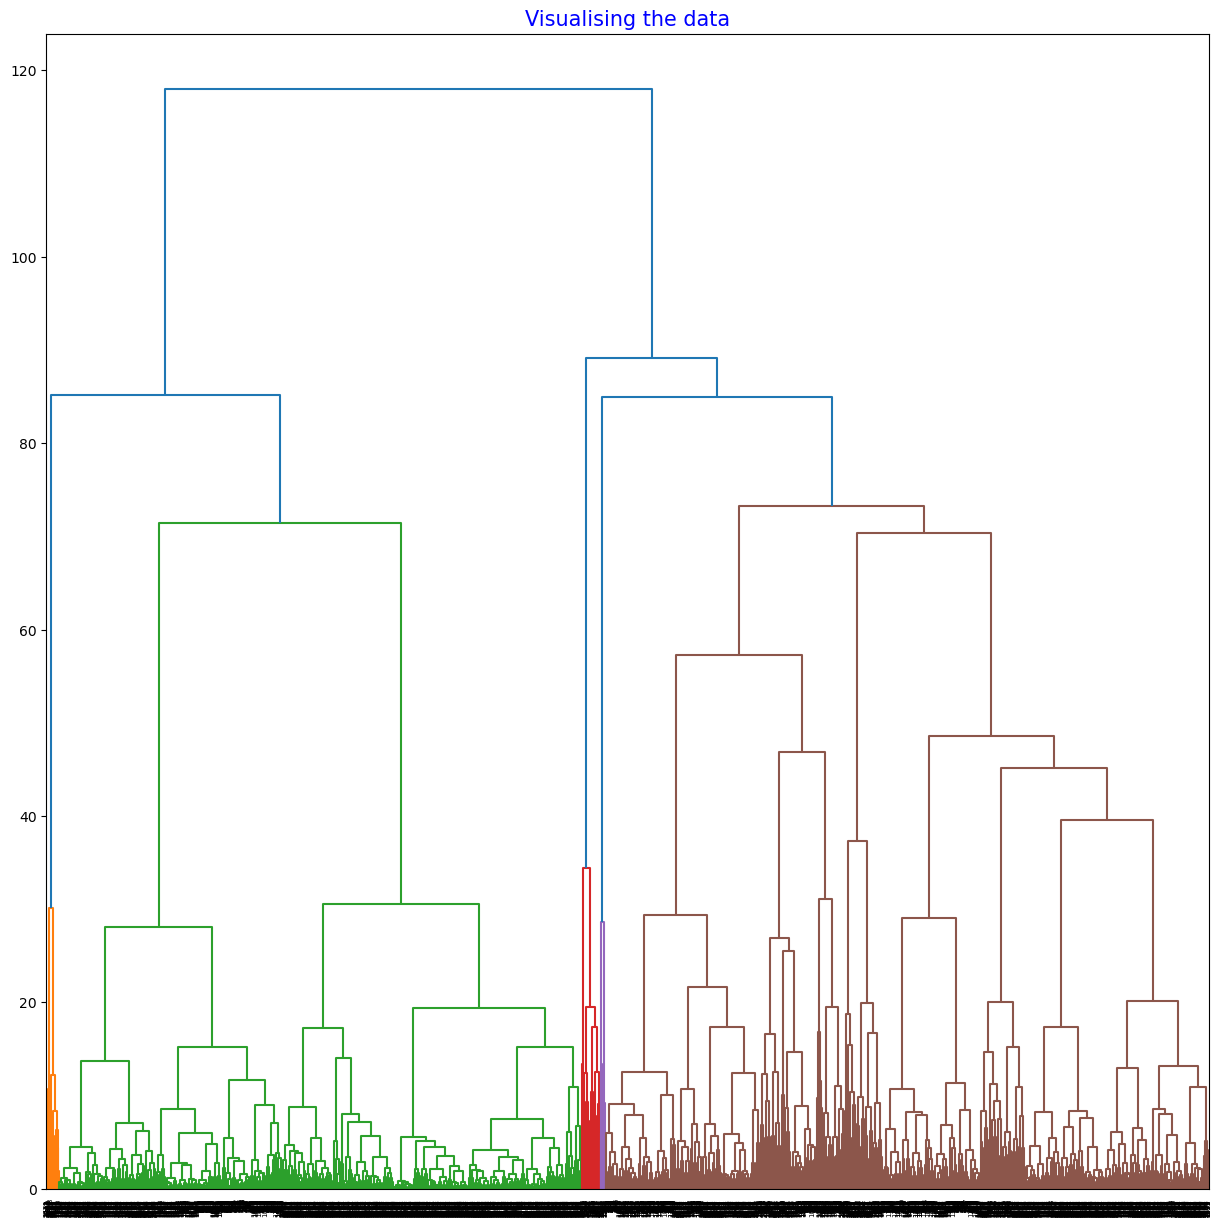

In [33]:
# H Clustering
# euclidean distanc, ward
plt.figure(figsize =(15, 15)) 
dict = {'fontsize':15,'fontweight' :16, 'color' : 'blue'}
plt.title('Visualising the data',fontdict = dict)
dendrogram = sch.dendrogram(sch.linkage(air_std, method = 'ward'))

In [42]:
air_std= pd.DataFrame(air_std)

In [43]:
X = air_std.values

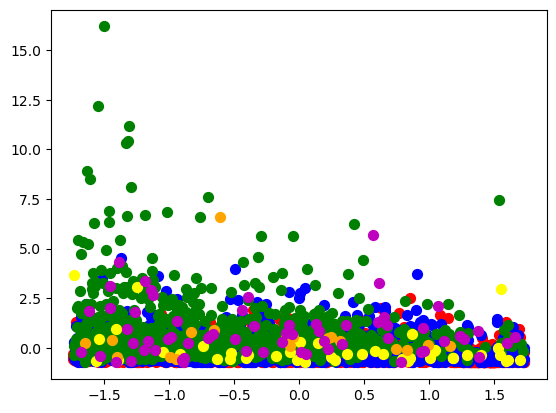

In [45]:
model_air = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
h_cluster = model_air.fit(X)
labels = model_air.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='yellow')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels==5, 0], X[labels==5, 1], s=50, marker='o', color='m')

In [84]:
# KMeans
kmeans=KMeans(n_clusters=6, init= 'k-means++', random_state=42)
km_air=kmeans.fit_predict(air_mm)

In [85]:
km_air

array([5, 5, 5, ..., 0, 1, 1])

In [86]:
km_air.shape

(3999,)

In [87]:
kmeans.cluster_centers_

array([[ 7.42164968e-01,  3.51248578e-02,  1.87119145e-02,
         2.24101480e-01,  1.26849894e-02,  2.60208521e-18,
         5.69863835e-02,  1.51433207e-01,  2.70305351e-02,
         4.72695361e-02,  3.02407915e-01,  1.00000000e+00],
       [ 8.00207185e-01,  2.08090406e-02,  8.47149727e-03,
         5.14375562e-02,  8.53548967e-03,  1.57232704e-03,
         1.67102887e-02,  8.07998496e-02,  6.94107035e-03,
         1.12732882e-02,  2.39360618e-01, -4.44089210e-16],
       [ 3.10113254e-01,  7.19287565e-02,  1.87937229e-02,
         7.70574534e-01,  7.76397516e-04,  8.15217391e-03,
         1.91363919e-01,  2.41549906e-01,  2.52293291e-02,
         4.38884331e-02,  6.60646325e-01,  1.00000000e+00],
       [ 2.52650894e-01,  5.87203855e-02,  3.00987808e-02,
         3.57142857e-02,  1.37362637e-02,  4.12087912e-03,
         3.33950120e-02,  1.22540250e-01,  3.34520835e-02,
         6.04913954e-02,  7.06076417e-01,  1.00000000e+00],
       [ 4.04765766e-01,  7.38484569e-02,  6.1841647

In [91]:
kmeans.inertia_

452.22950061980316

In [88]:
km=km_air+1
k_clust=list(km)

In [89]:
air['k_clust']=k_clust

In [90]:
k_m_clust=pd.DataFrame(round(air.groupby('k_clust').mean(),1))
k_m_clust

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
k_clust,,,,,,,,,,,,
1,2984.5,59882.2,208.6,1.9,1.0,1.0,15026.5,13.0,833.0,2.5,2510.2,1.0
2,3217.8,35476.0,94.4,1.2,1.0,1.0,4406.3,6.9,213.9,0.6,1987.3,0.0
3,1247.7,122626.9,209.5,4.1,1.0,1.0,50459.8,20.8,777.5,2.3,5481.4,1.0
4,1016.7,100108.7,335.5,1.1,1.0,1.0,8805.8,10.5,1030.9,3.2,5858.2,1.0
5,1628.2,125899.7,68.9,3.7,1.0,1.0,33035.5,17.3,225.7,0.7,4793.8,0.0
6,1167.6,49591.4,90.5,1.1,1.0,1.0,3376.9,6.8,242.6,0.7,5574.9,0.0


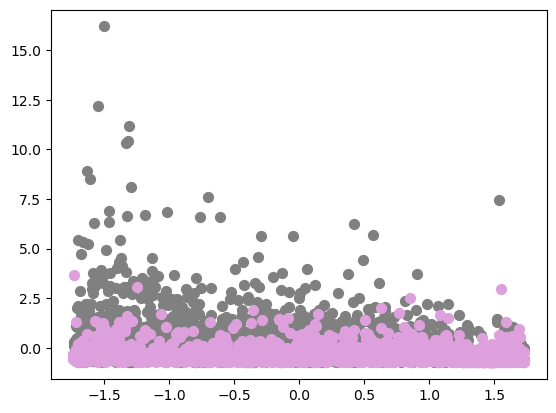

In [59]:
model_air1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
h_cluster1 = model_air1.fit(X)
labels = model_air1.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='gray')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='plum')

In [80]:
# KMeans MinMaxScaler Applied Dataset
air_means1=KMeans(n_clusters=2, init= 'k-means++', random_state=42)
km_air1=air_means1.fit_predict(air_mm)
km_air1

array([1, 1, 1, ..., 0, 1, 1])

In [81]:
air_means1.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [82]:
air_means1.cluster_centers_

array([[ 4.33978319e-01,  5.69280197e-02,  2.15461508e-02,
         4.15428764e-01,  7.76502363e-03,  4.55773126e-03,
         1.09621005e-01,  1.83518364e-01,  2.78255837e-02,
         4.90489598e-02,  5.57398375e-01,  1.00000000e+00],
       [ 5.40340593e-01,  3.50812450e-02,  7.85813260e-03,
         1.76330421e-01,  6.94996029e-03,  2.18427323e-03,
         3.87875269e-02,  1.06313612e-01,  7.34309944e-03,
         1.23113582e-02,  4.60411394e-01, -4.99600361e-16]])

In [83]:
air_means1.inertia_

1146.4595170935336

In [100]:
km1=km_air1+1
k_clust1=list(km1)
air['air_means1.labels']=k_clust1
km_m_clust=pd.DataFrame(round(air.groupby('air_means1.labels').agg(['mean'])))
km_m_clust

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,k_clust,k_clust1
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
air_means1.labels,,,,,,,,,,,,,,
1,1746.0,97053.0,240.0,3.0,1.0,1.0,28905.0,16.0,858.0,3.0,4625.0,1.0,3.0,1.0
2,2173.0,59808.0,88.0,2.0,1.0,1.0,10228.0,9.0,226.0,1.0,3821.0,0.0,4.0,2.0


In [101]:
#Cluster1, Tier 2 = "1" = Defines the group of fliers that earn the most out of the card and are frequent fliers
#Cluster, Tier 1 = "0" = Defines the group of fliers that earn the least and are the least frequent fliers


In [102]:
pd.DataFrame(round(air.groupby('air_means1.labels').count(),1))

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,k_clust,k_clust1
air_means1.labels,,,,,,,,,,,,,,
1,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481
2,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518


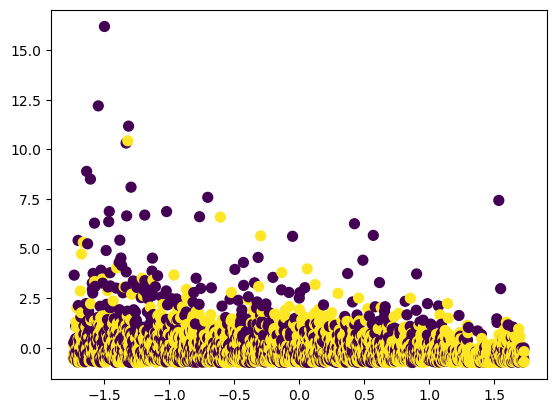

In [105]:
plt.scatter(X[:, 0], X[:, 1], c=km1, s=50, cmap='viridis')

In [116]:
# DBSCAN
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from itertools import product
array = air.values
array

array([[    1, 28143,     0, ...,     6,     2,     2],
       [    2, 19244,     0, ...,     6,     2,     2],
       [    3, 41354,     0, ...,     6,     2,     2],
       ...,
       [ 4019, 73597,     0, ...,     1,     1,     1],
       [ 4020, 54899,     0, ...,     2,     2,     2],
       [ 4021,  3016,     0, ...,     2,     2,     2]], dtype=int64)

In [117]:
standard_scaler = StandardScaler()
x = standard_scaler.fit_transform(array)
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.42744063e+00,  7.66919299e-01,  7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.42744063e+00,  7.66919299e-01,  7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.42744063e+00,  7.66919299e-01,  7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.42102997e+00, -1.30391816e+00, -1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -8.51335848e-01,  7.66919299e-01,  7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -8.51335848e-01,  7.66919299e-01,  7.66919299e-01]])

In [148]:
dbs=DBSCAN(eps=3, min_samples=23)
dbs.fit_predict(x)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [149]:
dbs.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [150]:
cl=pd.DataFrame(dbs.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [151]:
airline=pd.concat([air,cl],axis=1)
airline

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,k_clust,k_clust1,air_means1.labels,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,6,2,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,6,2,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,6,2,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,6,2,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,2,2,0


In [152]:
airline[airline['cluster']==-1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,k_clust,k_clust1,air_means1.labels,cluster
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,3,1,1,-1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,3,1,1,-1
70,72,84409,5031,2,1,1,15436,16,1150,4,7766,0,6,2,2,-1
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,4,1,1,-1
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,4,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,3,1,1,-1
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,2,2,2,-1
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,5,2,2,-1
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,2,2,2,-1


In [153]:
airline.mean()

ID                    2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award                    0.370343
k_clust                  3.494374
k_clust1                 1.629657
air_means1.labels        1.629657
cluster                  0.296324
dtype: float64

In [154]:
airline['cluster'].value_counts()

 0    2456
 1    1364
-1     179
Name: cluster, dtype: int64